In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df=pd.read_excel('Chapter3_Completions_DataSet.xlsx')

In [3]:
df.head()

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,173.4,45.5,1117.2,10.0
1,166.6,39.0,1117.2,10.0
2,159.8,41.6,1037.4,10.0
3,156.4,40.3,1197.0,10.0
4,170.0,46.8,1117.2,10.0


In [4]:
from sklearn import preprocessing
scaler= preprocessing.MinMaxScaler(feature_range=(0,1))
scaler.fit(df)
df_scaled=scaler.transform(df)
print(df_scaled)

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]
 [0.30555556 0.79166667 0.11864407 0.125     ]
 [0.08333333 0.58333333 0.06779661 0.08333333]
 [0.19444444 0.58333333 0.08474576 0.04166667]
 [0.02777778 0.375      0.06779661 0.04166667]
 [0.16666667 0.45833333 0.08474576 0.        ]
 [0.30555556 0.70833333 0.08474576 0.04166667]
 [0.13888889 0.58333333 0.10169492 0.04166667]
 [0.13888889 0.41666667 0.06779661 0.        ]
 [0.         0.41666667 0.01694915 0.        ]
 [0.41666667 0.83333333 0.03389831 0.04166667]
 [0.38888889 1.         0.08474576 0.125     ]
 [0.30555556 0.79166667 0.05084746 0.125     ]
 [0.22222222 0.625      0.06779661 0.08333333]
 [0.38888889 0.75       0.11864407 0.08333333]
 [0.22222222 0.75       0.08474576 0.08333333]
 [0.30555556 0.58333333 0.11864407 0.04166667]
 [0.22222222 

In [5]:
df.columns

Index(['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'],
      dtype='object')

In [6]:
df_scaled=pd.DataFrame(df_scaled, columns=['Stage Spacing', 'Cluster Spacing', 'Sand per ft (# per ft)',
       'Water per ft (gal per ft)'])

In [7]:
df_scaled

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
139,0.722222,0.458333,0.745763,0.833333
140,0.666667,0.458333,0.779661,0.958333
141,0.722222,0.458333,0.694915,0.916667
142,0.416667,0.291667,0.694915,0.750000


In [8]:
from sklearn.decomposition import NMF

In [9]:
nmf = NMF(n_components=2, init=None, solver='cd',beta_loss='frobenius',random_state=100)

In [10]:
nmf_transformed=nmf.fit_transform(df_scaled)

In [11]:
nmf.components_

array([[1.44077269, 0.18766052, 1.98977282, 1.98480237],
       [0.63681497, 2.30171012, 0.05259535, 0.        ]])

In [12]:
df_scaled_components = pd.DataFrame(np.round(nmf.components_,4), columns=df_scaled.columns)
df_scaled_components

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,1.4408,0.1877,1.9898,1.9848
1,0.6368,2.3017,0.0526,0.0000


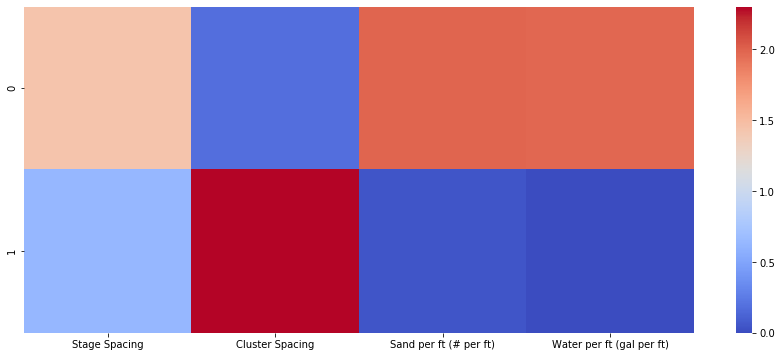

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(df_scaled_components,cmap='coolwarm')

In [14]:
nmf_transformed

array([[0.02607998, 0.27096692],
       [0.02733715, 0.18037996],
       [0.01304212, 0.21129669],
       [0.01803385, 0.19042102],
       [0.02067022, 0.28605977],
       [0.05781993, 0.33988673],
       [0.01796304, 0.24072114],
       [0.0275962 , 0.25082227],
       [0.01063978, 0.1523248 ],
       [0.02050699, 0.19909278],
       [0.03715856, 0.31122352],
       [0.02370267, 0.24577047],
       [0.0150722 , 0.18041018],
       [0.        , 0.16828405],
       [0.03629441, 0.37381785],
       [0.05329628, 0.43409612],
       [0.04391792, 0.34281083],
       [0.0346604 , 0.26877631],
       [0.06201831, 0.33130525],
       [0.03296018, 0.31980499],
       [0.04928529, 0.25800176],
       [0.04326585, 0.30036115],
       [0.        , 0.2783076 ],
       [0.06569824, 0.22769555],
       [0.03412918, 0.24357739],
       [0.03797267, 0.1810783 ],
       [0.04823255, 0.24571003],
       [0.03324   , 0.27239628],
       [0.03148974, 0.25587407],
       [0.02346863, 0.20910361],
       [0.